# Genetic algorithm

simple genetic algorithm that evolves polynomials to fit desired points.
Takes top p-percent of the population and reproduces it, while killing the bottom p-percent

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2

POPULATION_SIZE = 5000
N_GENERATIONS = 20000
POLYNOMIAL_DEGREE = 10
TOP_PERCENT = 0.3
SHOW_IMAGE_EVERY_NTH_FRAME = 1000
TRANSCRIPTION_ERROR_SIZE = 0.1

top_n = int(POPULATION_SIZE*TOP_PERCENT)

points2fit = np.array([[1, 2, 3, 4, 5, 6]])
point_values = np.array([[0, 5, 0, 5, 0, 5]])*1000
population = np.random.uniform(-10, 10, (POPULATION_SIZE, POLYNOMIAL_DEGREE+1))

Some functions to make code more organized

In [51]:
def make_intermediar(points2fit):
    intermediar = points2fit.repeat(POLYNOMIAL_DEGREE, axis=0)
    for i, row in enumerate(intermediar):
        intermediar[i] = row**(i+1)
    return np.concatenate((np.ones((1, points2fit.shape[1])), intermediar), axis=0)

def get_image(points2fit, intermediar, tops, point_values, img_name, n_interpol=100):
    x = np.linspace(np.min(points2fit), np.max(points2fit),n_interpol)
    x = np.expand_dims(x, axis=0)
    intermediar = make_intermediar(x)
    y = tops@intermediar

    colors = ['r', 'g', 'b', 'black', 'y', 'purple']

    plt.clf()
    for i, y1 in enumerate(y):
        plt.plot(x[0],y1, 'b')
    plt.scatter(points2fit[0], point_values[0], color='r')

    # not the most efficient way but simple
    plt.title(img_name.split('.')[0].split('/')[-1] + f'th generation, polynomial_degree={POLYNOMIAL_DEGREE}, population_size={POPULATION_SIZE}')
    plt.savefig(img_name)
    return cv2.imread(img_name)

# Run the evolution 

for N_GENERATIONS and get the population sorted by its fitness.
save images in a quick and dirty way to create a gif

100%|██████████| 20000/20000 [01:55<00:00, 172.91it/s]


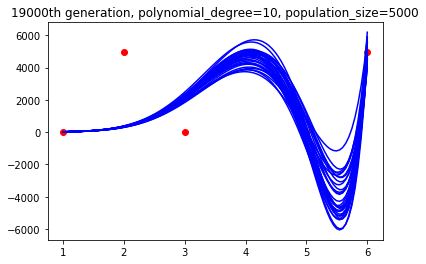

In [52]:
intermediar = make_intermediar(points2fit)
point_values_all = point_values.repeat(POPULATION_SIZE, axis=0)
iimg = 0
img_filenames = []

for igeneration in tqdm(range(N_GENERATIONS)):
    fitness = ((population@intermediar - point_values_all)**2).sum(axis=1)
    sorted_population = population[(fitness).argsort()]
    top = sorted_population[:top_n] + np.random.randn(top_n, POLYNOMIAL_DEGREE+1)*TRANSCRIPTION_ERROR_SIZE
    sorted_population[-top_n:] = top
    population = sorted_population
    if igeneration % SHOW_IMAGE_EVERY_NTH_FRAME == 0:
        img_filenames.append('imgs/'+str(iimg*SHOW_IMAGE_EVERY_NTH_FRAME)+'.png')
        img = get_image(points2fit, intermediar, sorted_population[:30], point_values, img_name=img_filenames[-1])
        iimg += 1
        cv2.imshow('best', img)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
fitness = ((population@intermediar - point_values_all)**2).sum(axis=1)
sorted_population = population[fitness.argsort()]

## generate a gif

In [49]:
import imageio
import glob
images = []
paths = glob.glob('imgs/*')
paths.sort()
for filename in img_filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(f'POPULATION_SIZE={POPULATION_SIZE} POLYNOMIAL_DEGREE={POLYNOMIAL_DEGREE}.gif', images, duration=1/10)

## remove images if they are not needed

In [47]:
! rm imgs/*